# 1. Notebook Setup

Import libraries

In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from math import sqrt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sys.path.append("/home/jovyan/Solar-Irradiance-Forecasting/src/")
import eda as eda
import helpers as hlp

Importing plotly failed. Interactive plots will not work.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Loading and Prepare data

Load CSV file that contains GHI

In [5]:
df = pd.read_csv("../../data/Folsom_irradiance.csv", infer_datetime_format=True)
df

,timeStamp,ghi,dni,dhi
0,2014-01-02 08:00:00,0.0,0.0,0.0
1,2014-01-02 08:01:00,0.0,0.0,0.0
2,2014-01-02 08:02:00,0.0,0.0,0.0
3,2014-01-02 08:03:00,0.0,0.0,0.0
4,2014-01-02 08:04:00,0.0,0.0,0.0
...,...,...,...,...
1552315,2016-12-31 07:55:00,0.0,0.0,0.0
1552316,2016-12-31 07:56:00,0.0,0.0,0.0
1552317,2016-12-31 07:57:00,0.0,0.0,0.0
1552318,2016-12-31 07:58:00,0.0,0.0,0.0


In [6]:
df = df[["timeStamp", "ghi"]]

In [9]:
# Split data into train and test based on the years
test_start = "2016-01-01"

df_test = df.loc[df["timeStamp"] >= test_start]

Calculate the persistence forecast by shifting the irradiance values by one time step


In [21]:
df_test['persistence_forecast'] = df_test['ghi'].shift(20)
df_test = df_test.fillna(0.0)
df_test

,timeStamp,ghi,persistence_forecast
1029600,2016-01-01 08:00:00,0.0,0.0
1029601,2016-01-01 08:01:00,0.0,0.0
1029602,2016-01-01 08:02:00,0.0,0.0
1029603,2016-01-01 08:03:00,0.0,0.0
1029604,2016-01-01 08:04:00,0.0,0.0
...,...,...,...
1552315,2016-12-31 07:55:00,0.0,0.0
1552316,2016-12-31 07:56:00,0.0,0.0
1552317,2016-12-31 07:57:00,0.0,0.0
1552318,2016-12-31 07:58:00,0.0,0.0


In [70]:
prediction_horizon = 20
rmse_values = []

# Iterate through the data to calculate RMSE for each horizon
for horizon in range(1, prediction_horizon + 1):
    # Shift the actual values by the horizon to simulate a persistence forecast
    df_test['persistence_forecast'] = df_test['ghi'].shift(horizon)
    
    # Calculate RMSE for this horizon
    rmse = np.sqrt(np.mean((df_test['ghi'] - df_test['persistence_forecast'])**2))
    rmse_values.append(rmse)

Plot RMSE values against the prediction horizon

/tmp/ipykernel_28294/2717219537.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../../output/model_validation/persistence-20m-horizon.png", box_inches='tight')


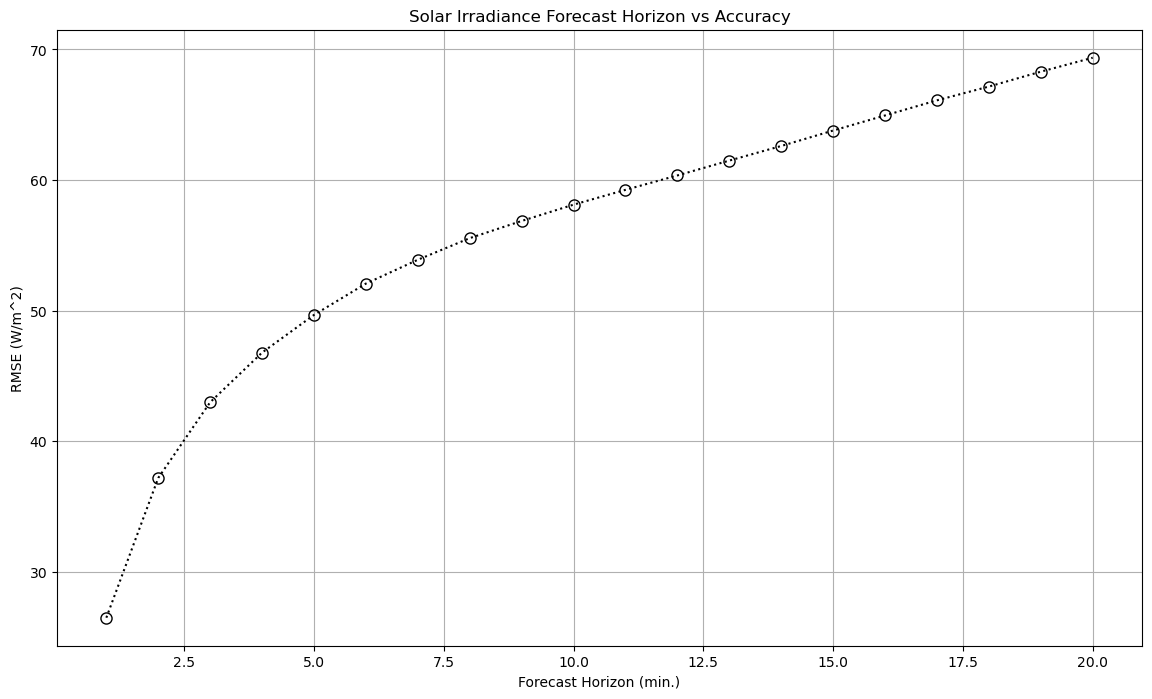

In [79]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, prediction_horizon + 1), rmse_values, label='Persistence', 
         color='black', linestyle="dotted", marker='o', markerfacecolor='none', markersize=8)
plt.xlabel('Forecast Horizon (min.)')
plt.ylabel('RMSE (W/m^2)')
plt.title('Solar Irradiance Forecast Horizon vs Accuracy')
plt.grid(True)
plt.savefig("../../output/model_validation/persistence-20m-horizon.png", box_inches='tight')
plt.show()